In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os

########## INPUT ############
f=5 # number of fake_backend want to choose
lower_limit= 3 # the lower limit of qubits for the circuit
upper_limit= 17 # the lower limit of qubits for the circuit
steps= 2 #jump in qubit numbers
name_of_algo='hamiltonian'

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, f)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.valencia.fake_valencia.FakeValenciaV2,
 qiskit.providers.fake_provider.backends.burlington.fake_burlington.FakeBurlingtonV2,
 qiskit.providers.fake_provider.backends.prague.fake_prague.FakePrague,
 qiskit.providers.fake_provider.backends.lima.fake_lima.FakeLimaV2,
 qiskit.providers.fake_provider.backends.jakarta.fake_jakarta.FakeJakartaV2]

In [3]:
benchmarks=[]
for i in range(lower_limit,upper_limit,steps):
    label = name_of_algo+str(i)
    benchmarks.append((supermarq.hamiltonian_simulation.HamiltonianSimulation(i),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    #circuit.draw(output="mpl")
    print(circuit.draw())

-------------------------- hamiltonian3 ---------------------------
     ┌───┐┌───────────┐┌───┐                           ┌─┐                    »
q_0: ┤ H ├┤ Rz(-3π/4) ├┤ H ├──■────────────────■───────┤M├────────────────────»
     ├───┤├───────────┤├───┤┌─┴─┐┌──────────┐┌─┴─┐     └╥┘                 ┌─┐»
q_1: ┤ H ├┤ Rz(-3π/4) ├┤ H ├┤ X ├┤ Rz(-π/2) ├┤ X ├──■───╫───────────────■──┤M├»
     ├───┤├───────────┤├───┤└───┘└──────────┘└───┘┌─┴─┐ ║ ┌──────────┐┌─┴─┐└╥┘»
q_2: ┤ H ├┤ Rz(-3π/4) ├┤ H ├──────────────────────┤ X ├─╫─┤ Rz(-π/2) ├┤ X ├─╫─»
     └───┘└───────────┘└───┘                      └───┘ ║ └──────────┘└───┘ ║ »
c: 3/═══════════════════════════════════════════════════╩═══════════════════╩═»
                                                        0                   1 »
«        
«q_0: ───
«        
«q_1: ───
«     ┌─┐
«q_2: ┤M├
«     └╥┘
«c: 3/═╩═
«      2 
-------------------------- hamiltonian5 ---------------------------
     ┌───┐┌───────────┐┌───┐                          

In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'hamiltonian3': [0.6666666666666666, 1.0, 0.26666666666666666, 0.7333333333333333, 0.0, 0.25], 'hamiltonian5': [0.4, 1.0, 0.2962962962962963, 0.5, 0.0, 0.171875], 'hamiltonian7': [0.2857142857142857, 1.0, 0.3076923076923077, 0.37662337662337664, 0.0, 0.12878787878787878], 'hamiltonian9': [0.2222222222222222, 1.0, 0.3137254901960784, 0.30158730158730157, 0.0, 0.10267857142857142], 'hamiltonian11': [0.18181818181818182, 1.0, 0.31746031746031744, 0.25133689839572193, 0.0, 0.08529411764705883], 'hamiltonian13': [0.15384615384615385, 1.0, 0.32, 0.2153846153846154, 0.0, 0.07291666666666667], 'hamiltonian15': [0.13333333333333333, 1.0, 0.3218390804597701, 0.18840579710144928, 0.0, 0.06366459627329192]}


In [5]:
jobs =[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("------------------------BACKEND-NAME :: ", backend().name)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        score_list=[]
        for i in range(0,5):
            job = backend().run(circuit, shots=1000)
            result=job.result()
            counts = job.result(0).get_counts()
            score = benchmark.score(counts)
            score_list.append(score)
        score = np.mean(score_list) 
        sd = np.std(score_list)
        print(label," :: ",score,"                       SD :: ",sd)
        #counts=job.result(0).count()
        jobs.append((label,benchmark,backend,job,score,sd))
#jobs

=============SCORES OF ALL THE CIRCUITS=============
------------------------BACKEND-NAME ::  fake_valencia
hamiltonian3  ::  0.9480466094067259                        SD ::  0.003702251567177261
hamiltonian5  ::  0.9463666094067257                        SD ::  0.004219194235870149
hamiltonian7  ::  0.9654180379781543                        SD ::  0.0026747496545071543
hamiltonian9  ::  0.9708466094067256                        SD ::  0.0017618733015925482
hamiltonian11  ::  0.9763193366794531                        SD ::  0.00039249151172572095
hamiltonian13  ::  0.9797850709451902                        SD ::  0.0030341644395374574
hamiltonian15  ::  0.9827266094067282                        SD ::  0.0025859105424073455
------------------------BACKEND-NAME ::  fake_burlington
hamiltonian3  ::  0.9482466094067259                        SD ::  0.005935205697081383
hamiltonian5  ::  0.9492066094067256                        SD ::  0.008934785951549097
hamiltonian7  ::  0.96498946654958

In [6]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score,sd in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   
#print(all_scores)    

USED BACKEND:: fake_valencia ; CIRCUIT_NAME: hamiltonian3 ; SCORE = 0.9480466094067259


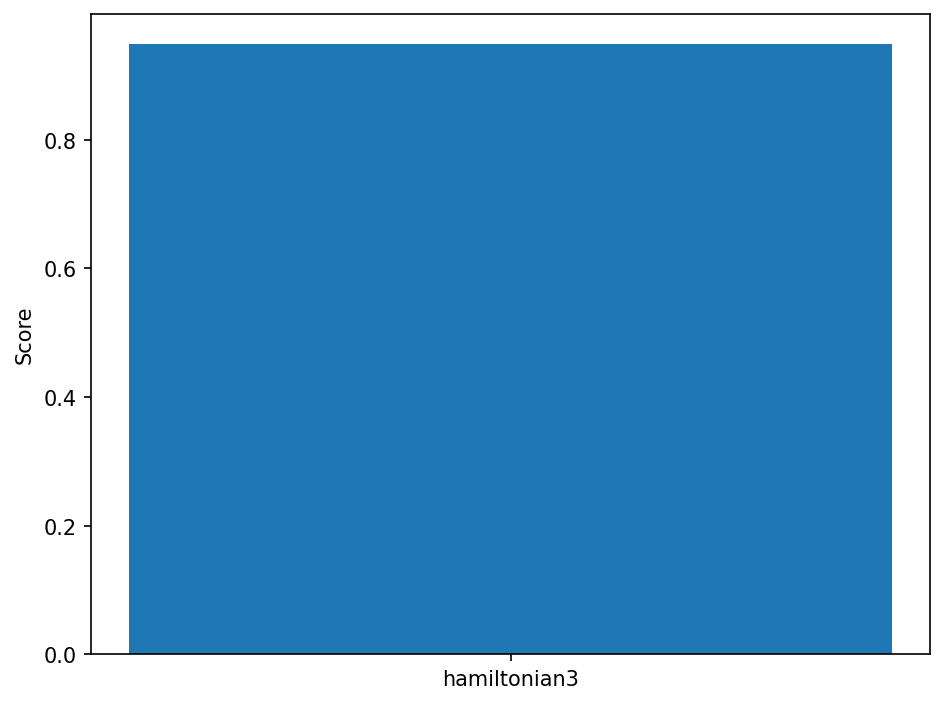

-----------------------------------------------------------
USED BACKEND:: fake_valencia ; CIRCUIT_NAME: hamiltonian5 ; SCORE = 0.9463666094067257


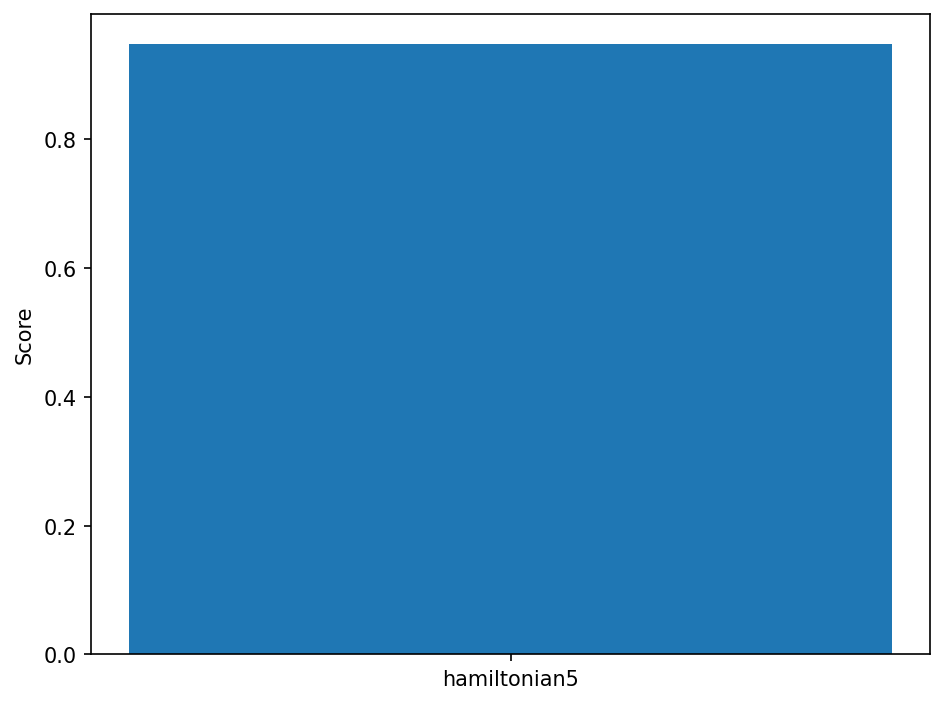

-----------------------------------------------------------
USED BACKEND:: fake_valencia ; CIRCUIT_NAME: hamiltonian7 ; SCORE = 0.9654180379781543


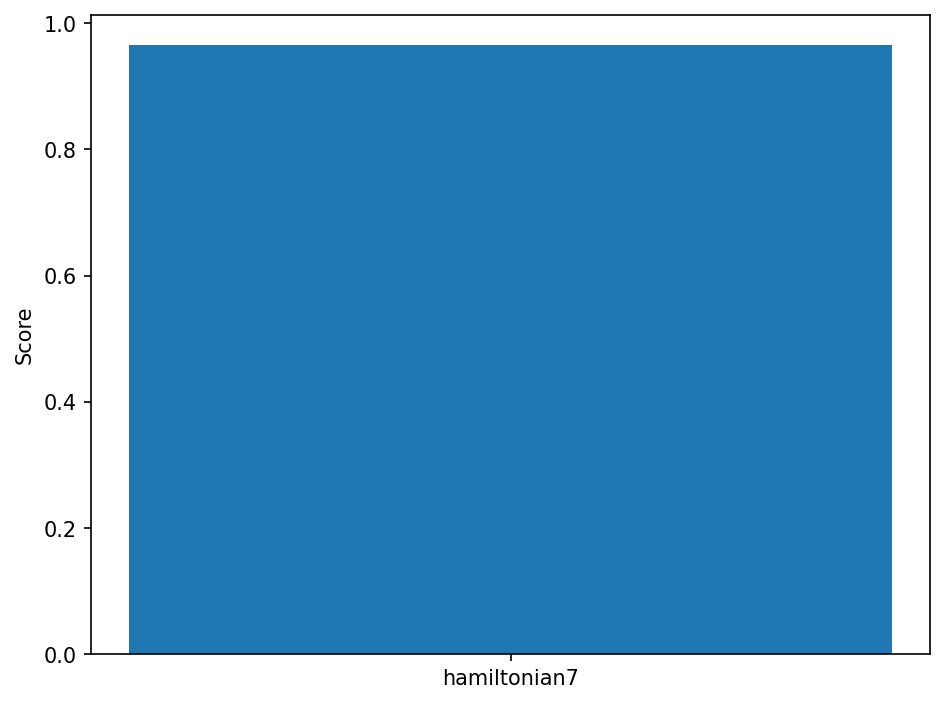

-----------------------------------------------------------
USED BACKEND:: fake_valencia ; CIRCUIT_NAME: hamiltonian9 ; SCORE = 0.9708466094067256


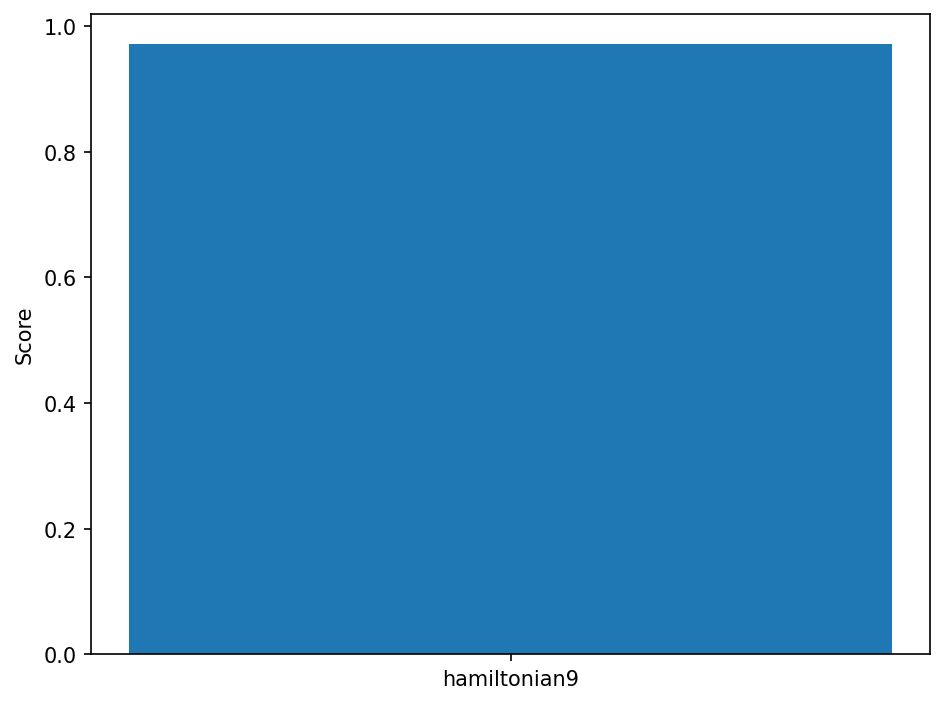

-----------------------------------------------------------
USED BACKEND:: fake_valencia ; CIRCUIT_NAME: hamiltonian11 ; SCORE = 0.9763193366794531


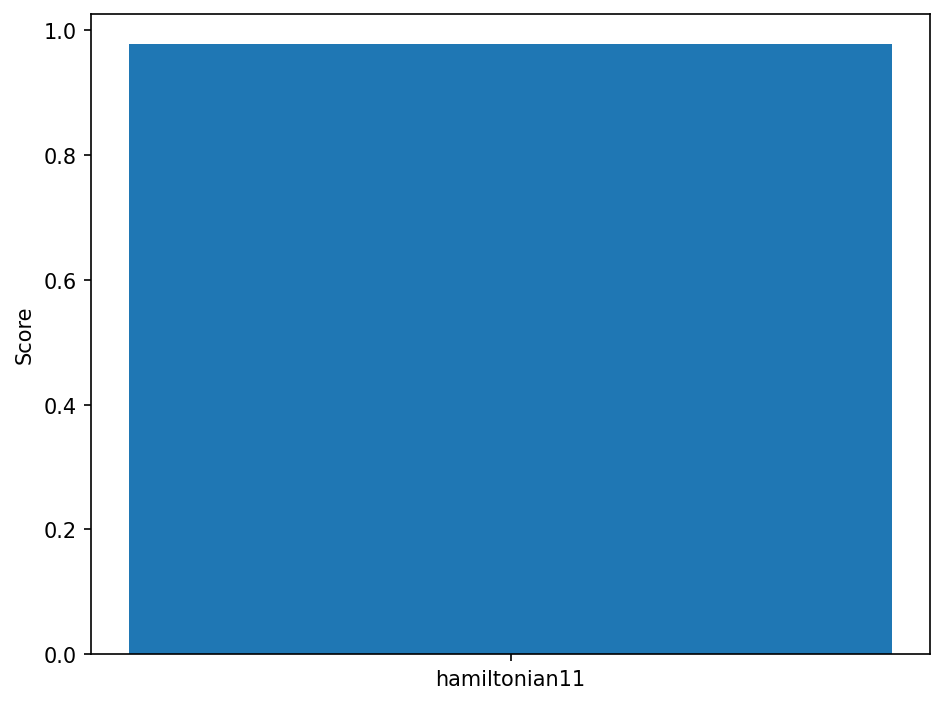

-----------------------------------------------------------
USED BACKEND:: fake_valencia ; CIRCUIT_NAME: hamiltonian13 ; SCORE = 0.9797850709451902


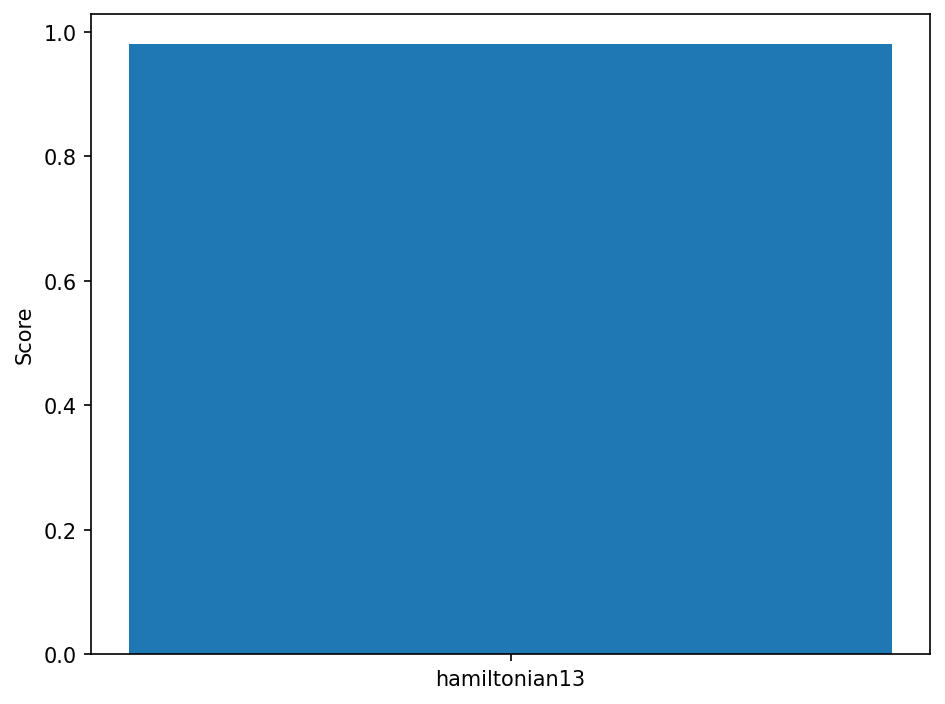

-----------------------------------------------------------
USED BACKEND:: fake_valencia ; CIRCUIT_NAME: hamiltonian15 ; SCORE = 0.9827266094067282


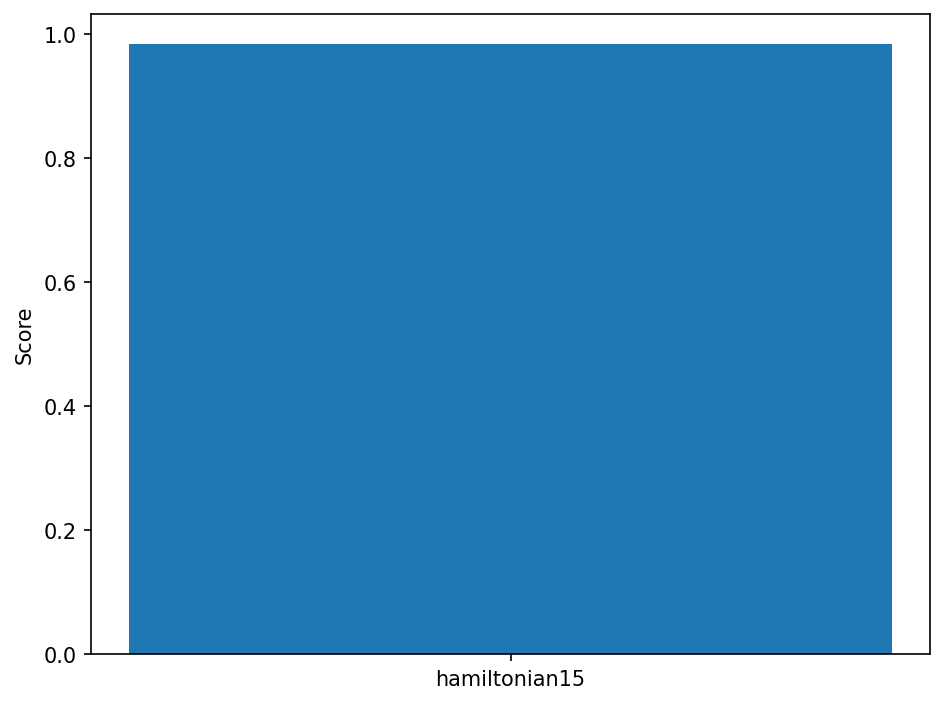

-----------------------------------------------------------
USED BACKEND:: fake_burlington ; CIRCUIT_NAME: hamiltonian3 ; SCORE = 0.9482466094067259


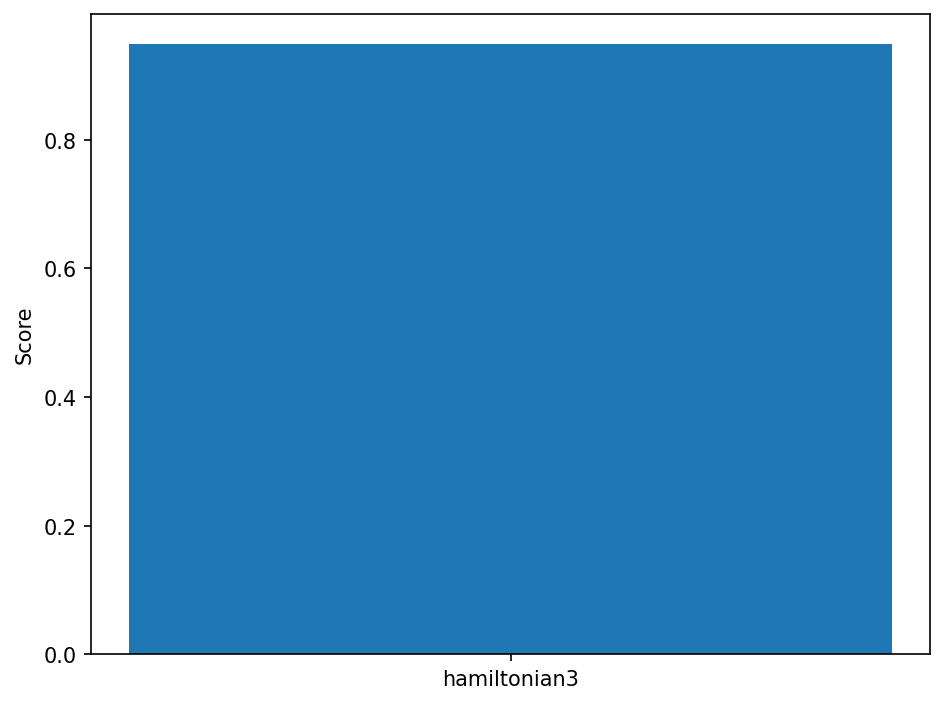

-----------------------------------------------------------
USED BACKEND:: fake_burlington ; CIRCUIT_NAME: hamiltonian5 ; SCORE = 0.9492066094067256


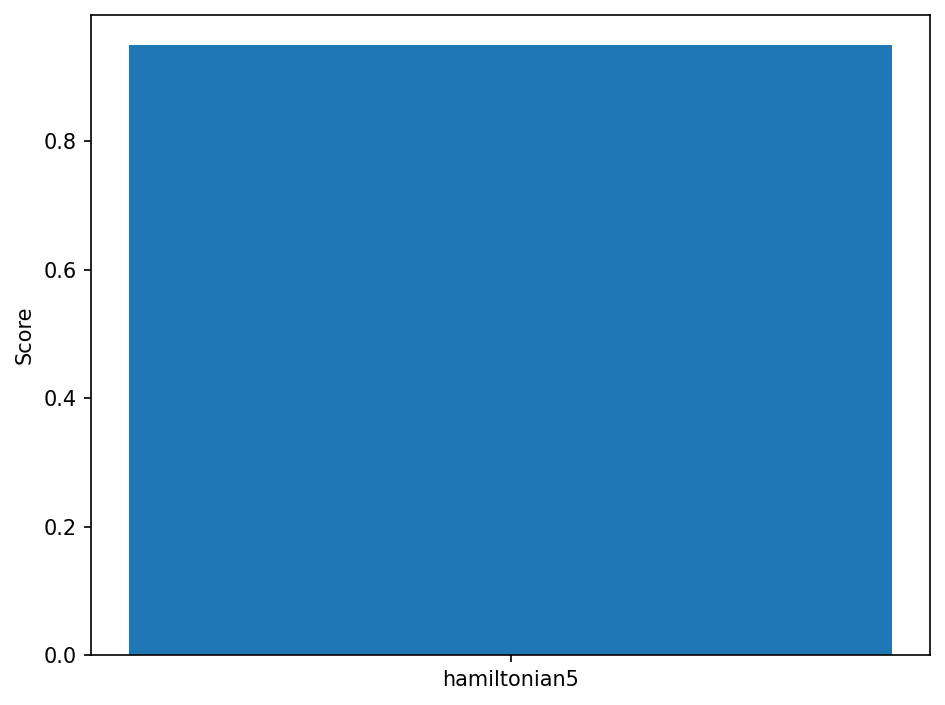

-----------------------------------------------------------
USED BACKEND:: fake_burlington ; CIRCUIT_NAME: hamiltonian7 ; SCORE = 0.9649894665495828


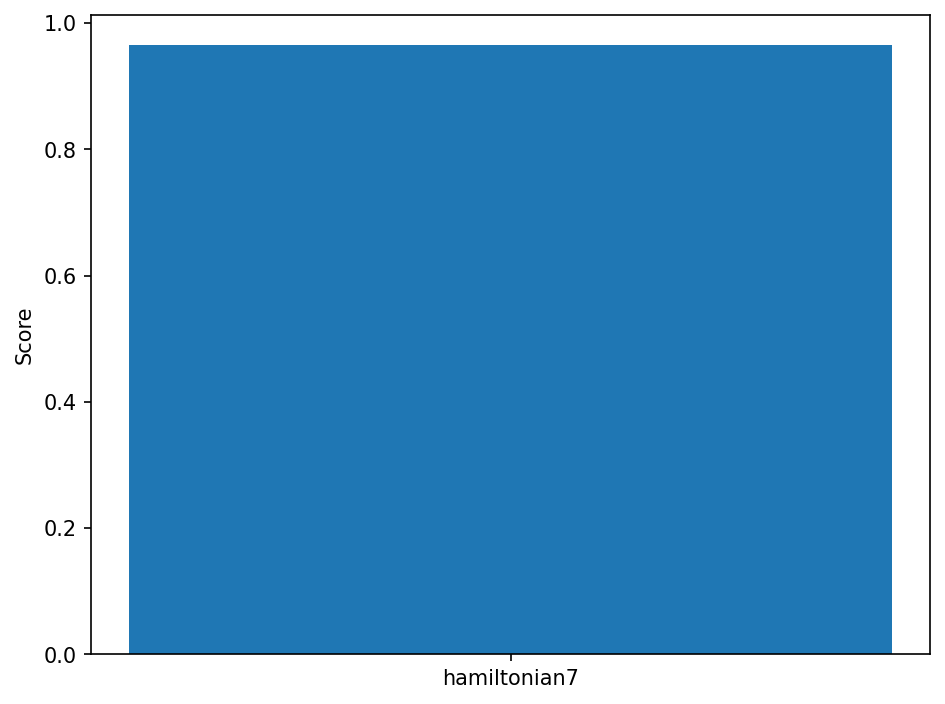

-----------------------------------------------------------
USED BACKEND:: fake_burlington ; CIRCUIT_NAME: hamiltonian9 ; SCORE = 0.9742910538511701


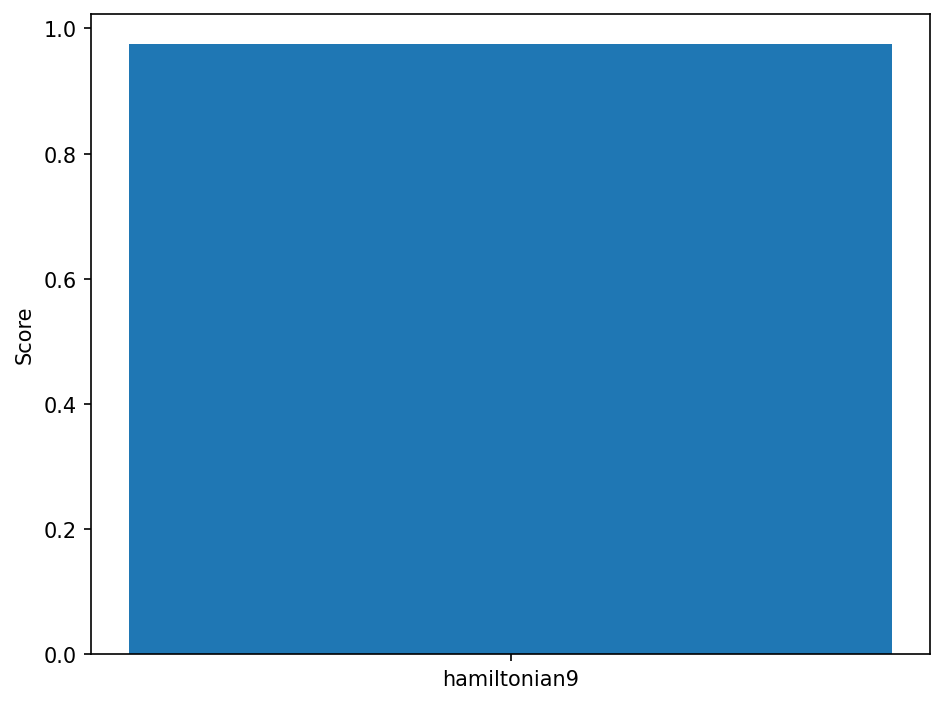

-----------------------------------------------------------
USED BACKEND:: fake_burlington ; CIRCUIT_NAME: hamiltonian11 ; SCORE = 0.98019206395218


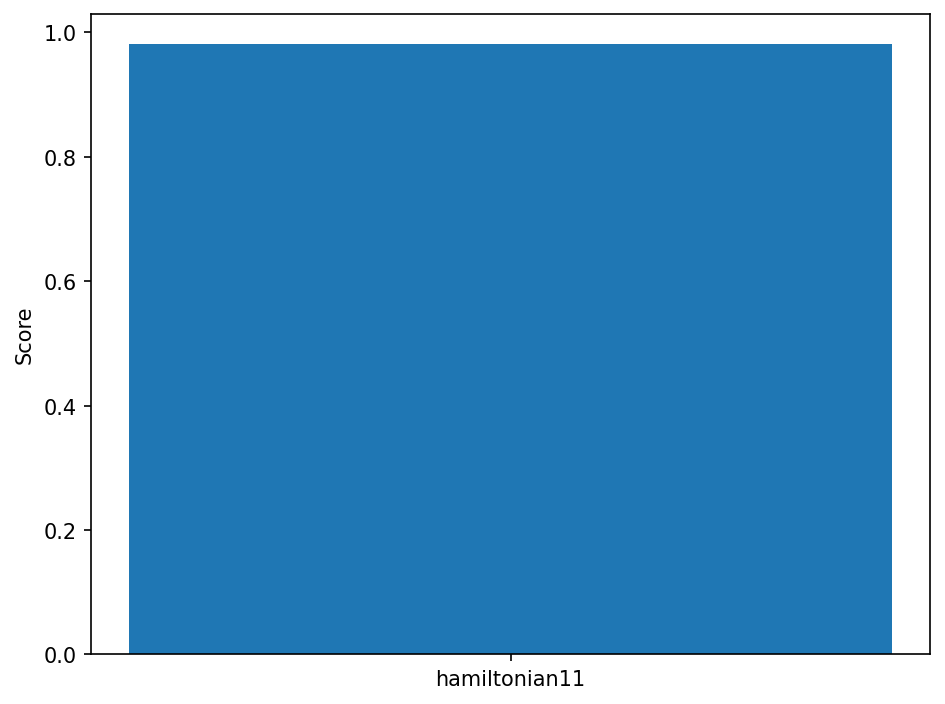

-----------------------------------------------------------
USED BACKEND:: fake_burlington ; CIRCUIT_NAME: hamiltonian13 ; SCORE = 0.981600455560575


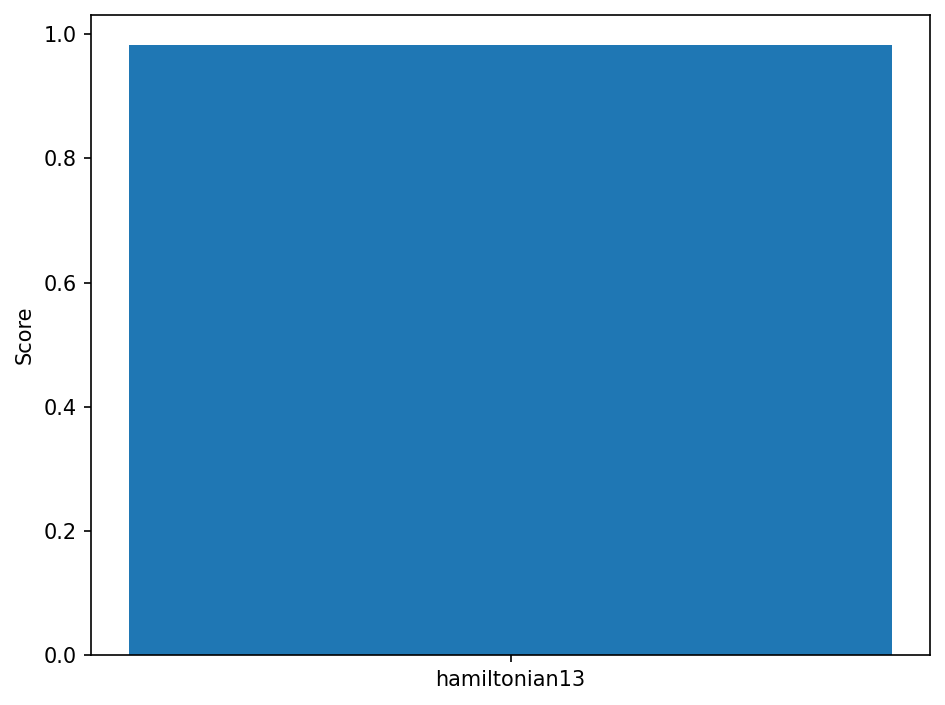

-----------------------------------------------------------
USED BACKEND:: fake_burlington ; CIRCUIT_NAME: hamiltonian15 ; SCORE = 0.9842199427400619


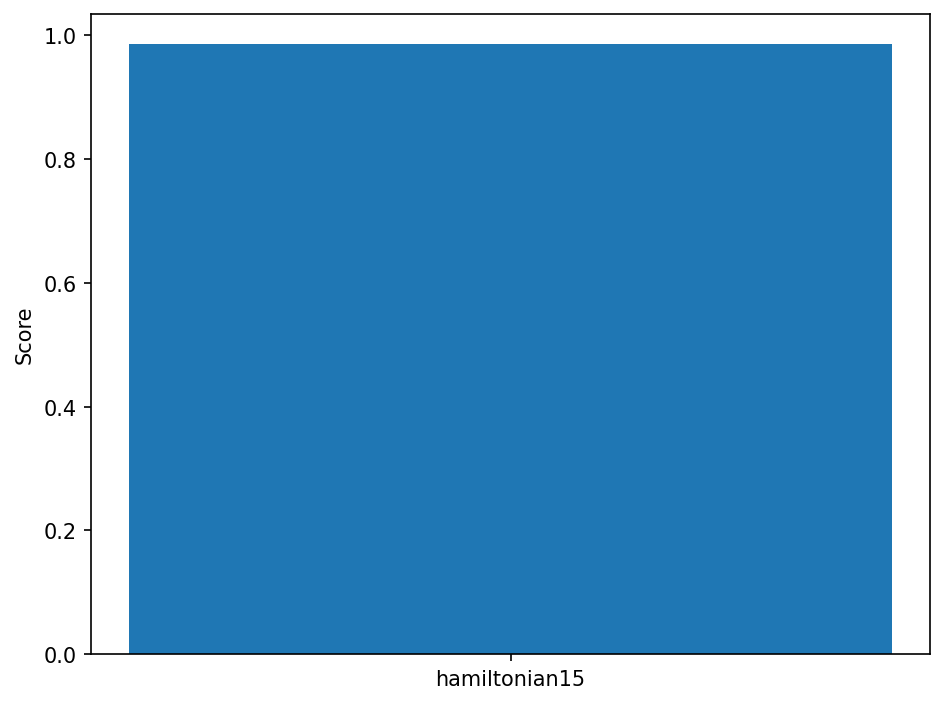

-----------------------------------------------------------
USED BACKEND:: fake_prague ; CIRCUIT_NAME: hamiltonian3 ; SCORE = 0.9839132760733925


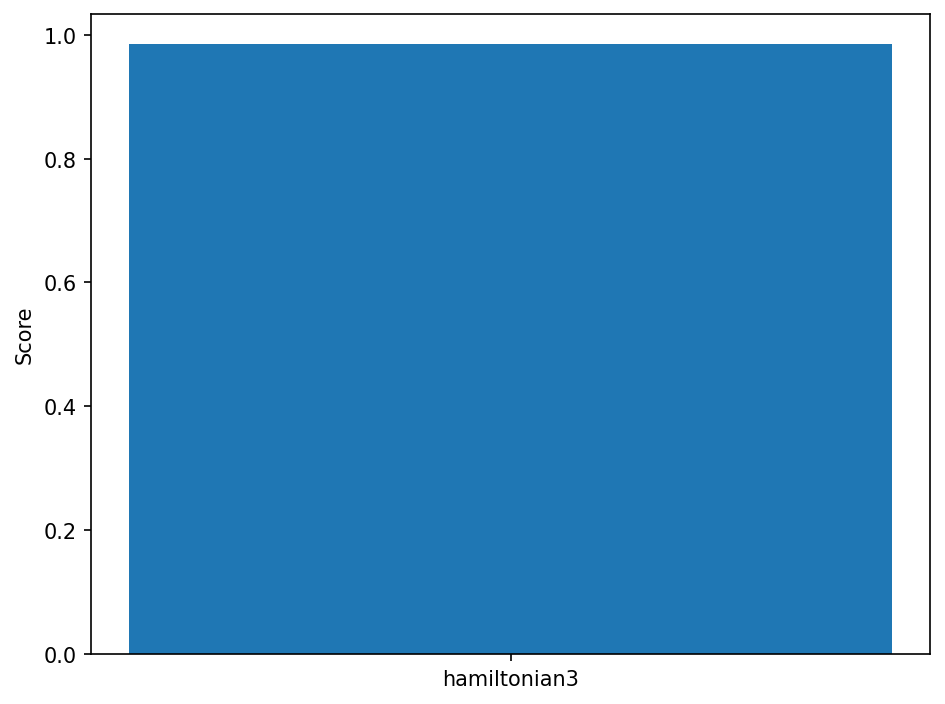

-----------------------------------------------------------
USED BACKEND:: fake_prague ; CIRCUIT_NAME: hamiltonian5 ; SCORE = 0.9813666094067257


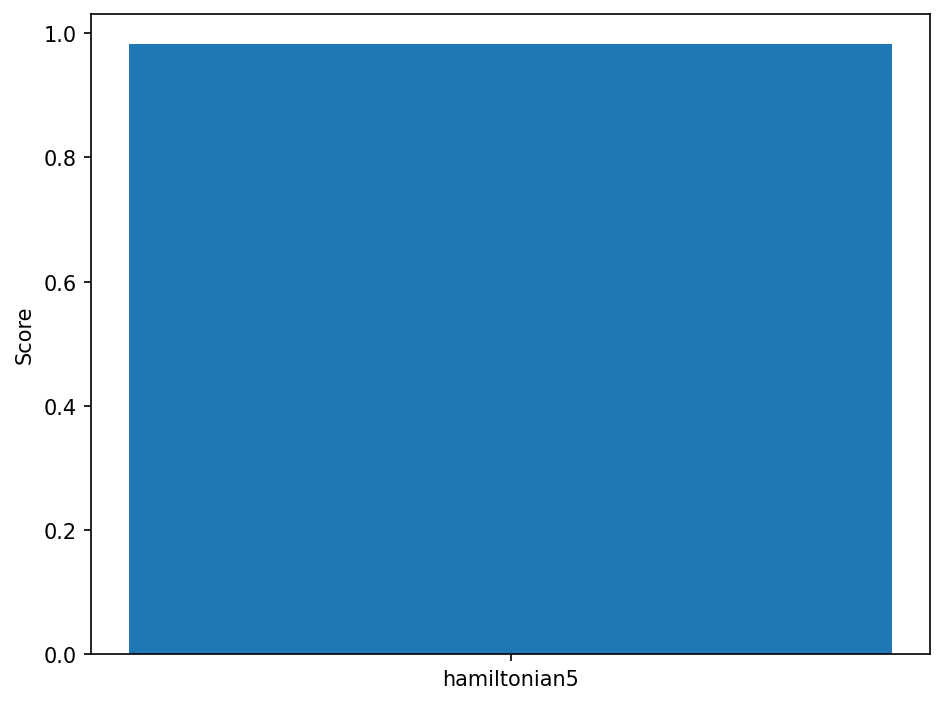

-----------------------------------------------------------
USED BACKEND:: fake_prague ; CIRCUIT_NAME: hamiltonian7 ; SCORE = 0.9859608951210115


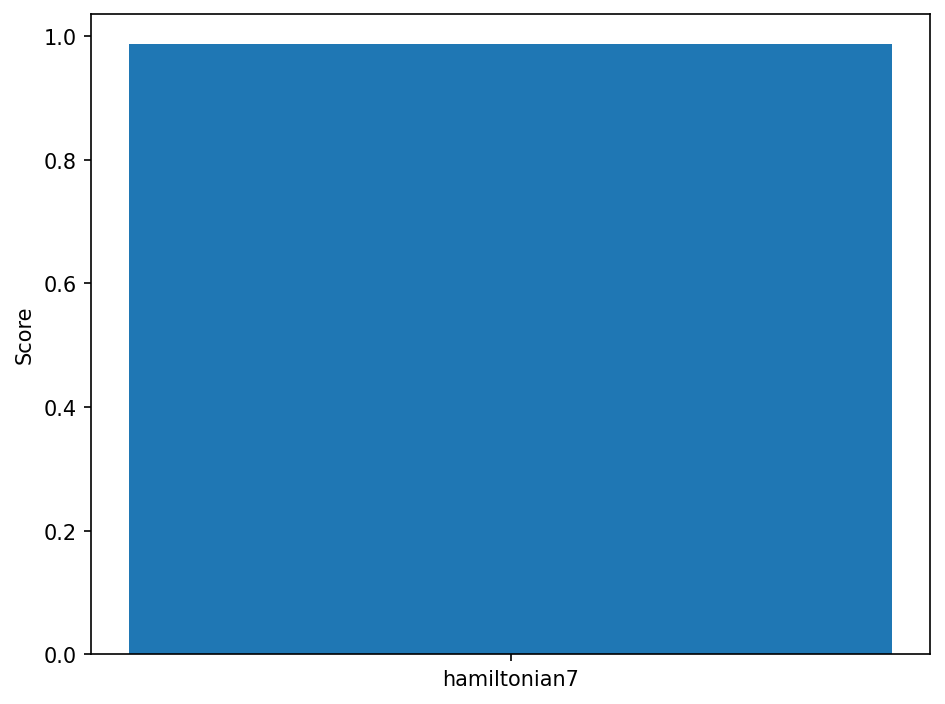

-----------------------------------------------------------
USED BACKEND:: fake_prague ; CIRCUIT_NAME: hamiltonian9 ; SCORE = 0.9857799427400591


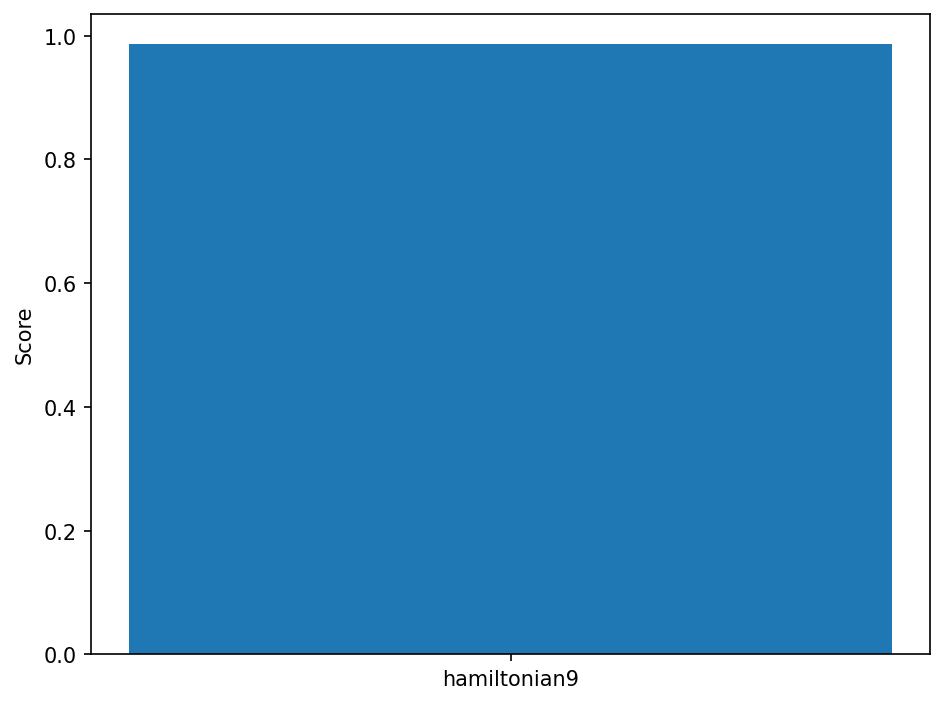

-----------------------------------------------------------
USED BACKEND:: fake_prague ; CIRCUIT_NAME: hamiltonian11 ; SCORE = 0.9864647912249076


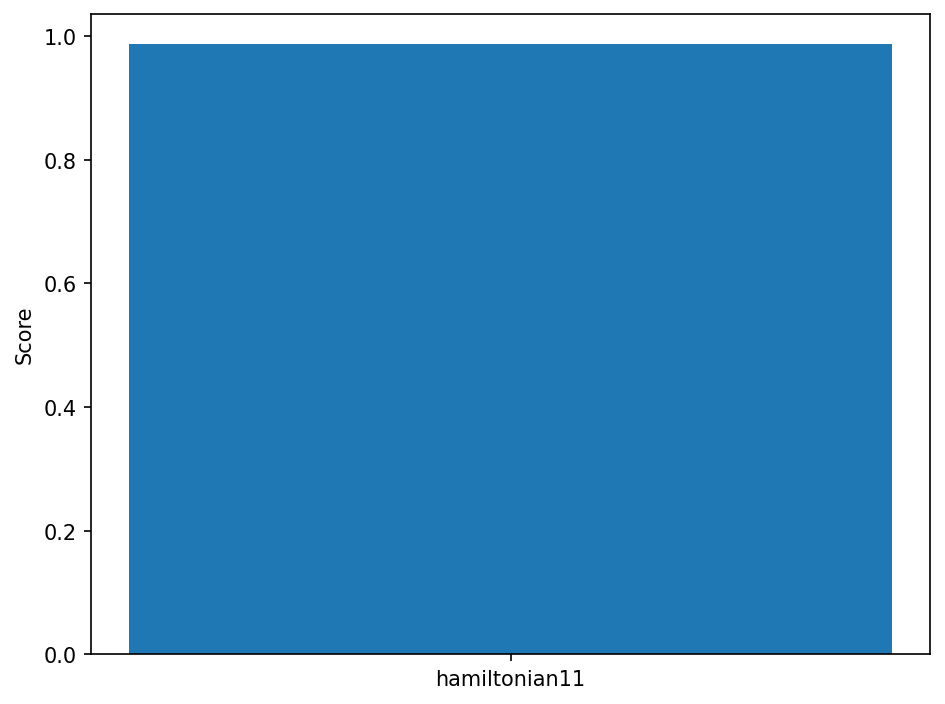

-----------------------------------------------------------
USED BACKEND:: fake_prague ; CIRCUIT_NAME: hamiltonian13 ; SCORE = 0.9873081478682673


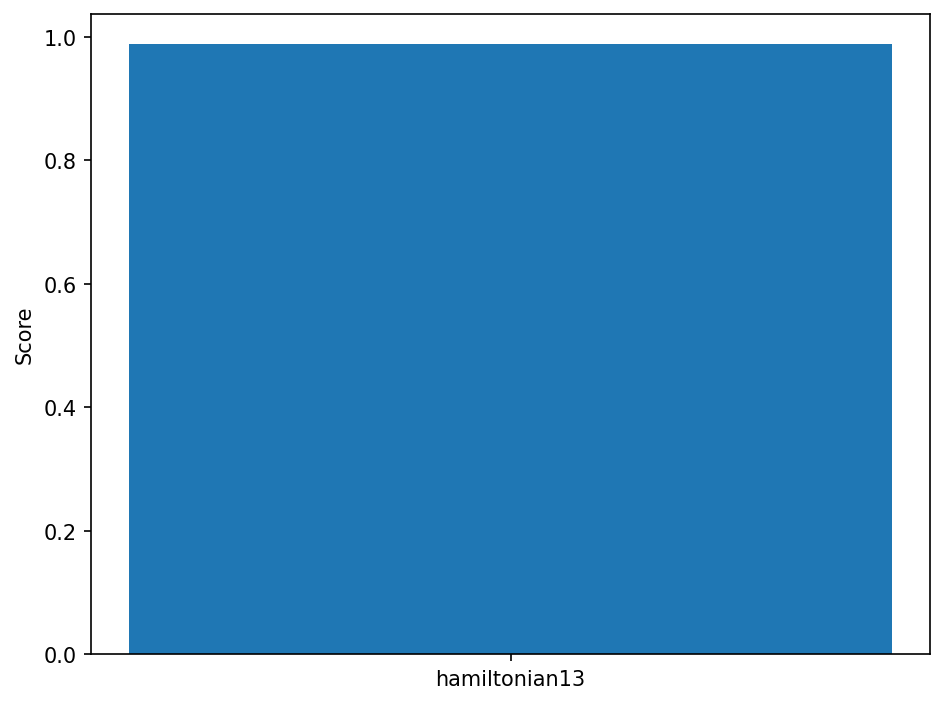

-----------------------------------------------------------
USED BACKEND:: fake_prague ; CIRCUIT_NAME: hamiltonian15 ; SCORE = 0.9866999427400618


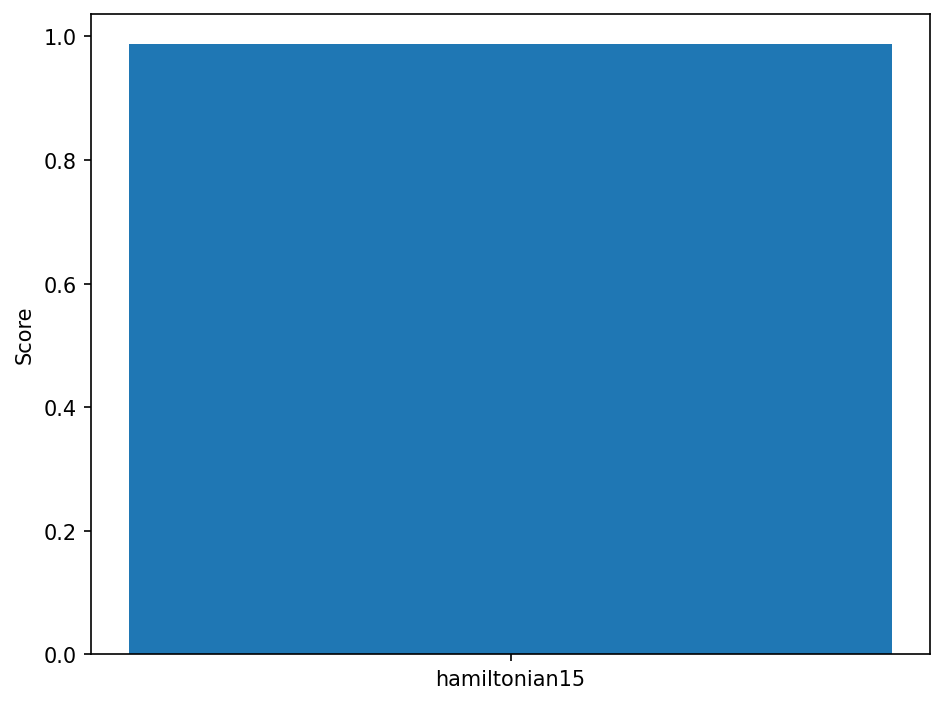

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: hamiltonian3 ; SCORE = 0.9577132760733926


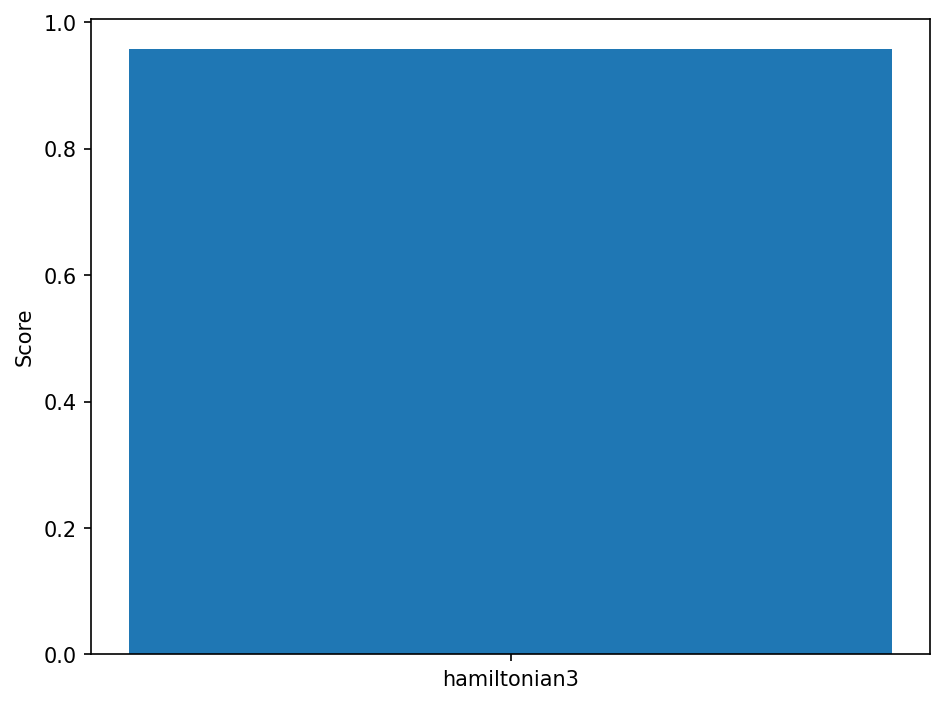

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: hamiltonian5 ; SCORE = 0.9392066094067257


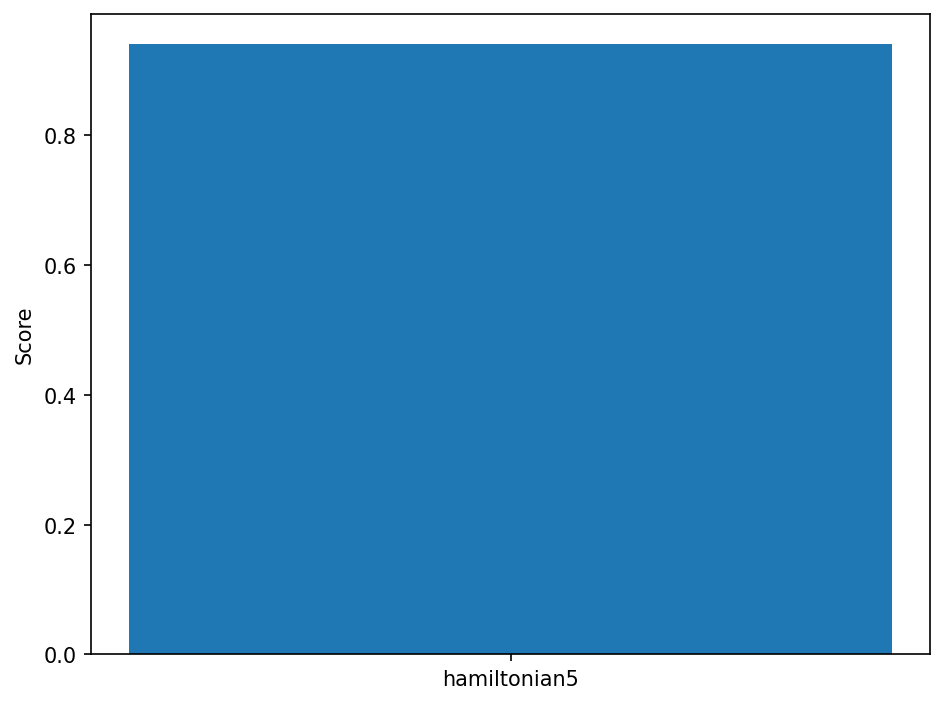

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: hamiltonian7 ; SCORE = 0.9607323236924399


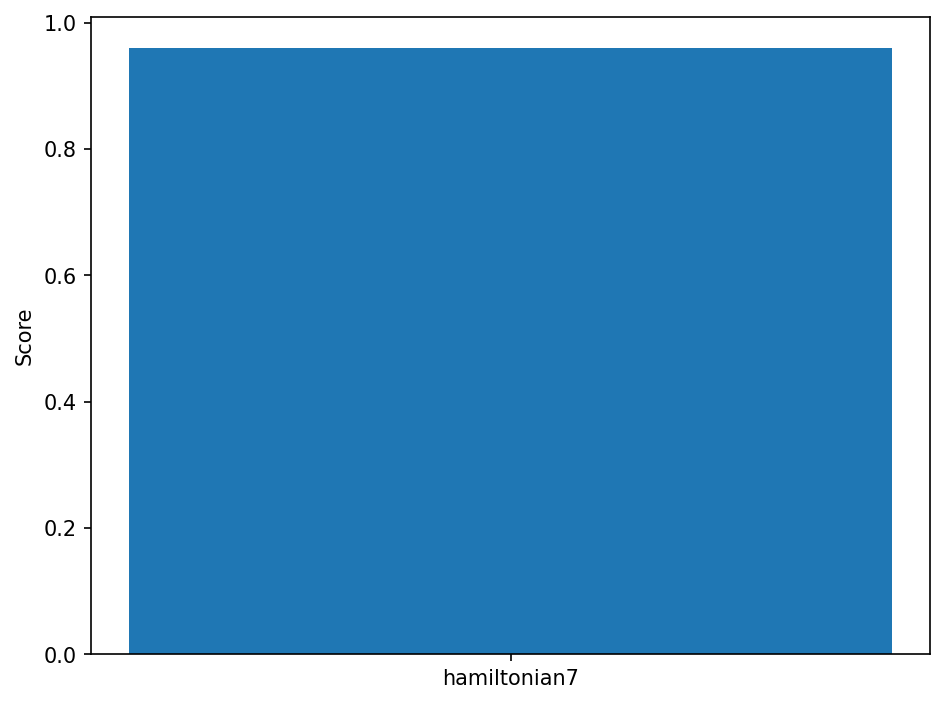

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: hamiltonian9 ; SCORE = 0.9667577205178368


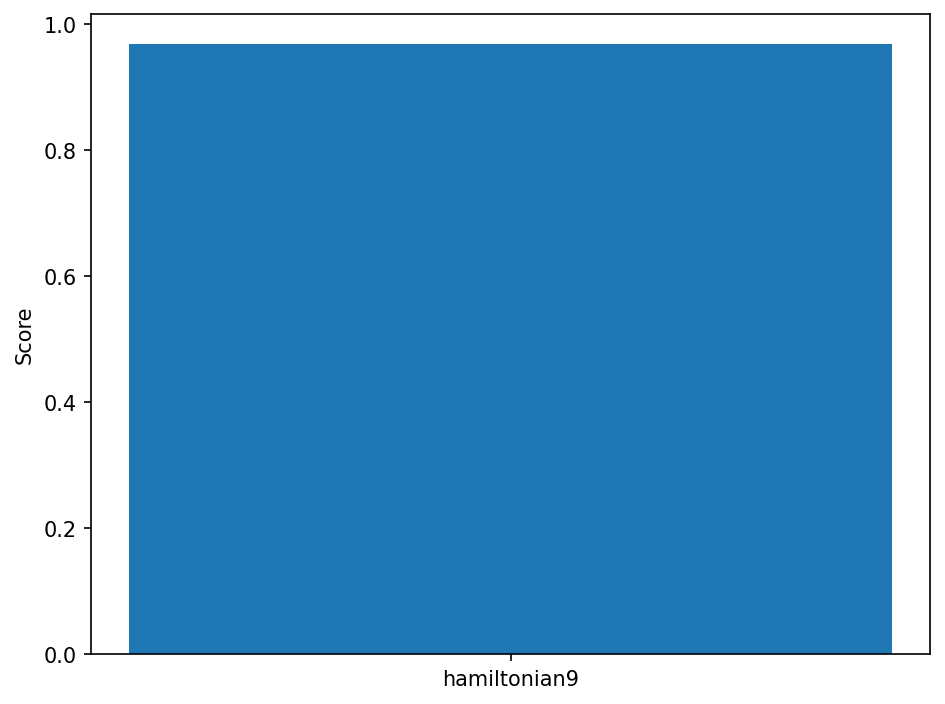

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: hamiltonian11 ; SCORE = 0.9720102457703618


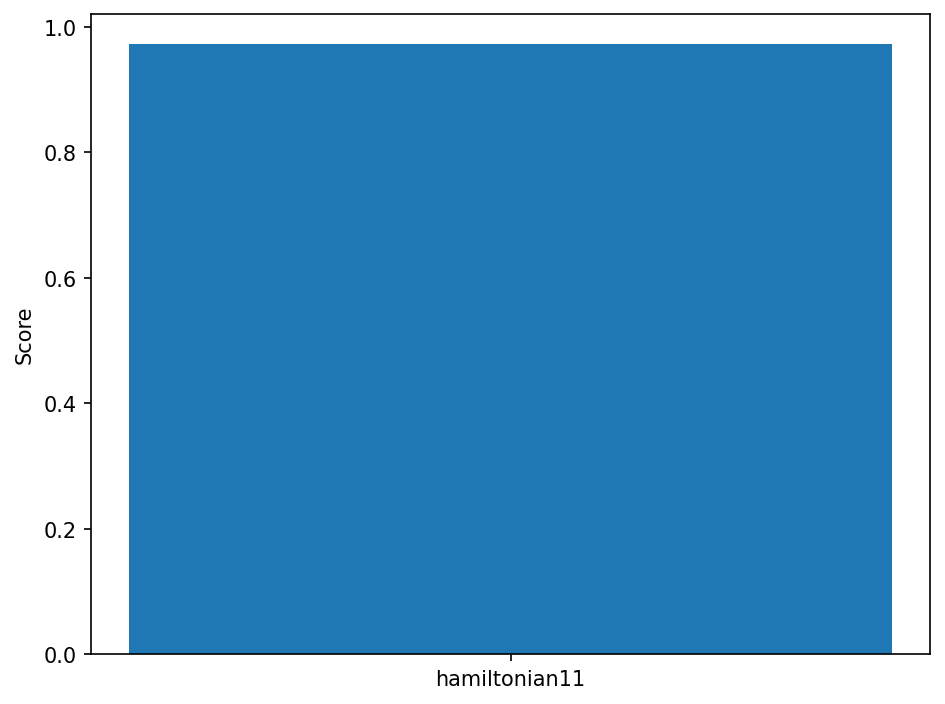

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: hamiltonian13 ; SCORE = 0.9786773786374979


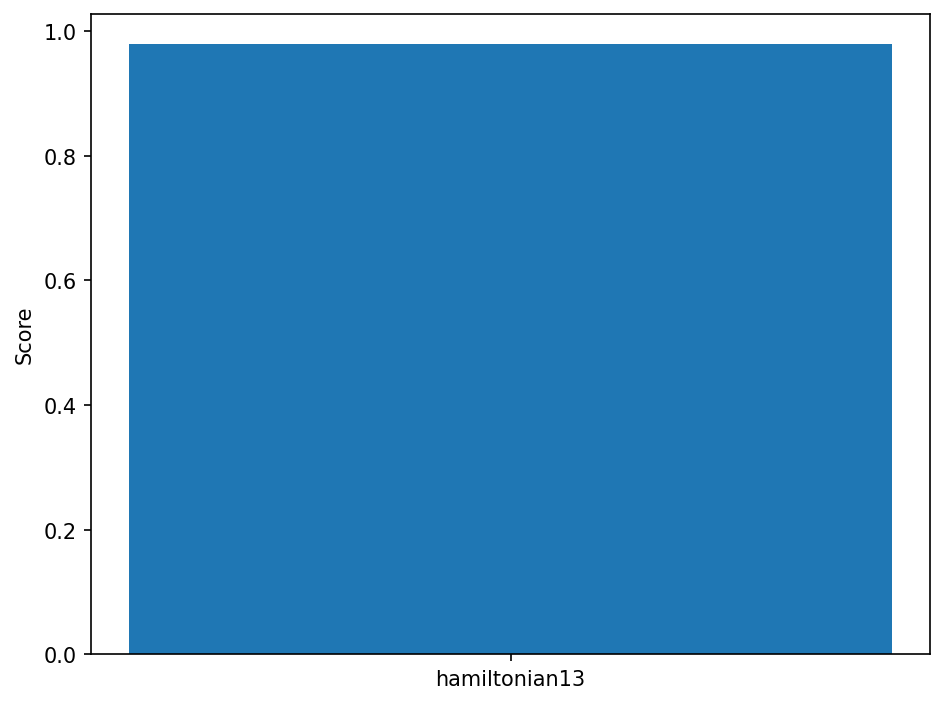

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: hamiltonian15 ; SCORE = 0.9795132760733953


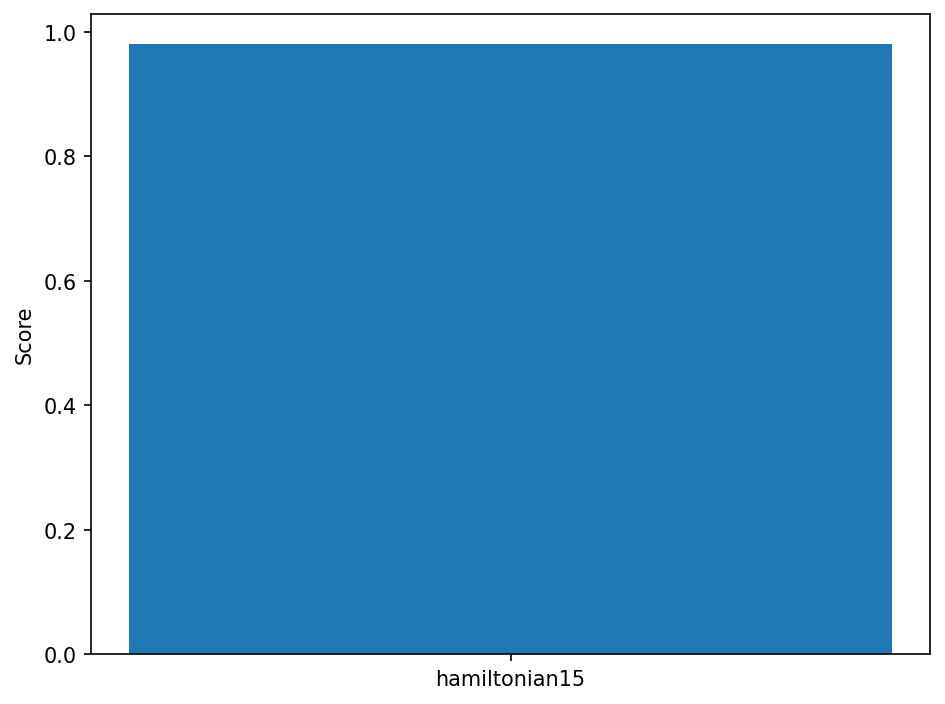

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: hamiltonian3 ; SCORE = 0.9573799427400592


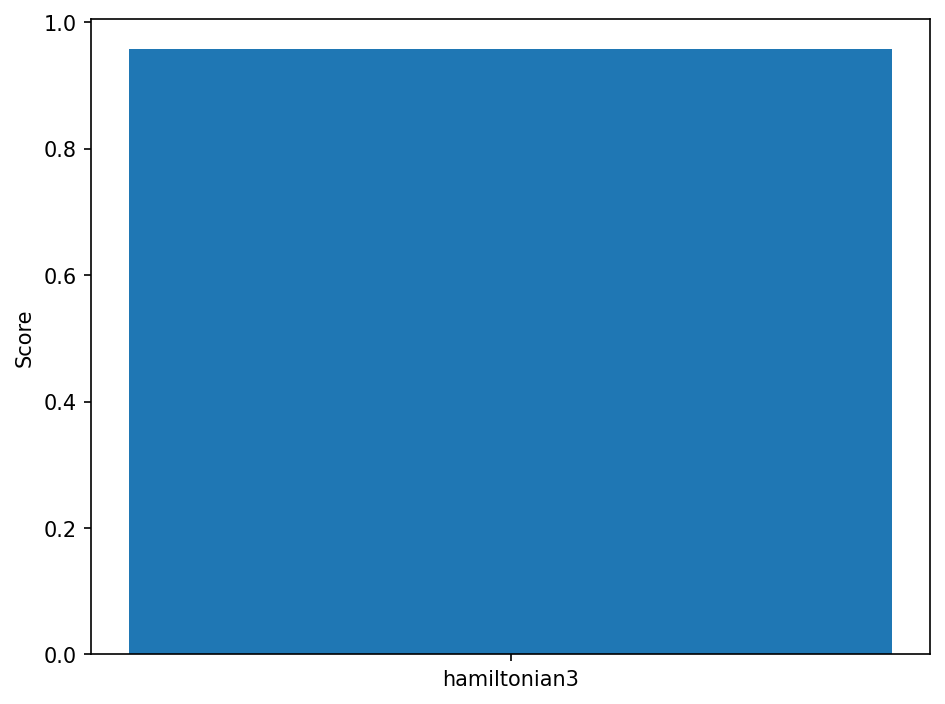

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: hamiltonian5 ; SCORE = 0.9698466094067257


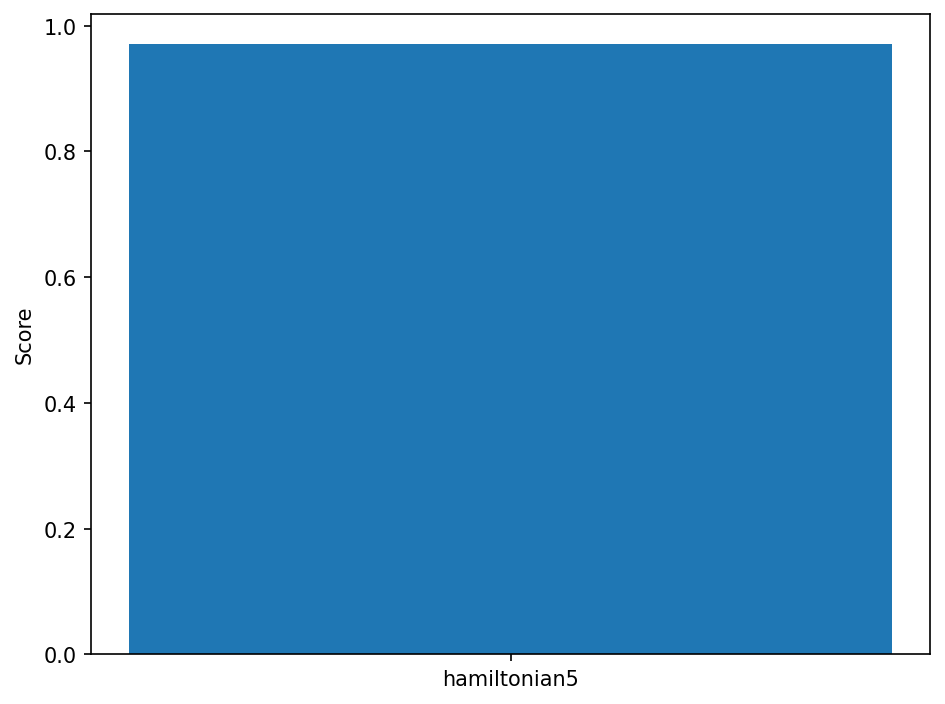

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: hamiltonian7 ; SCORE = 0.9667037522638685


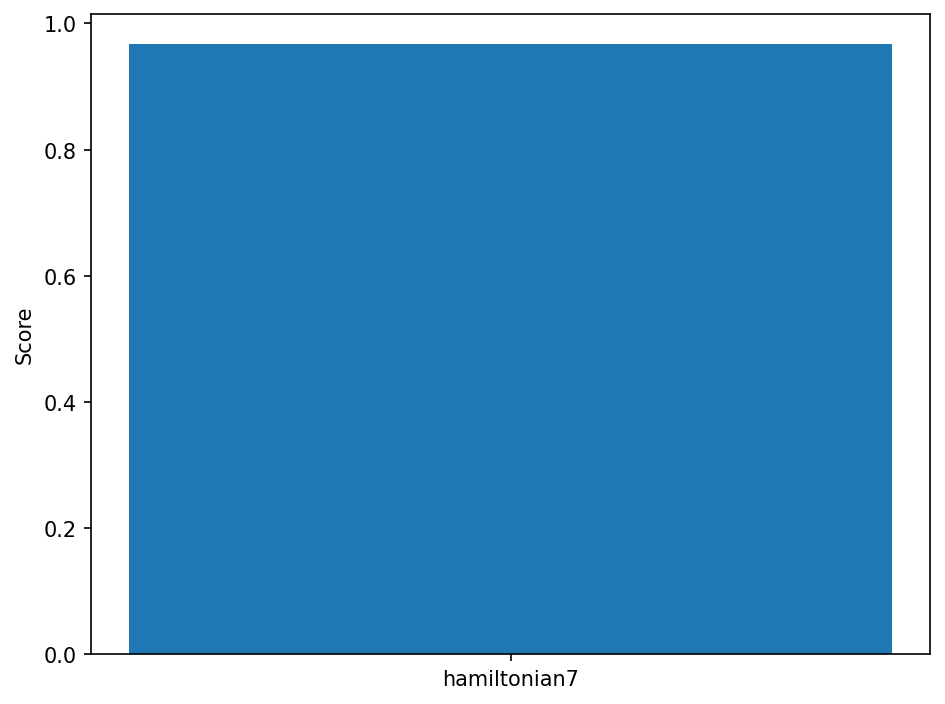

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: hamiltonian9 ; SCORE = 0.9723577205178369


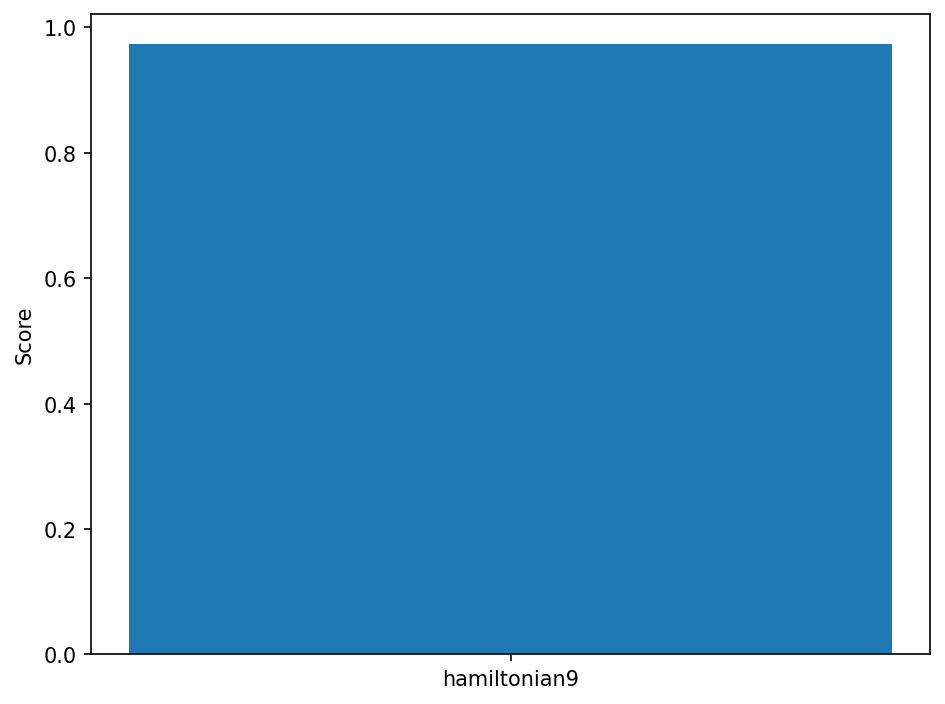

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: hamiltonian11 ; SCORE = 0.9768284275885437


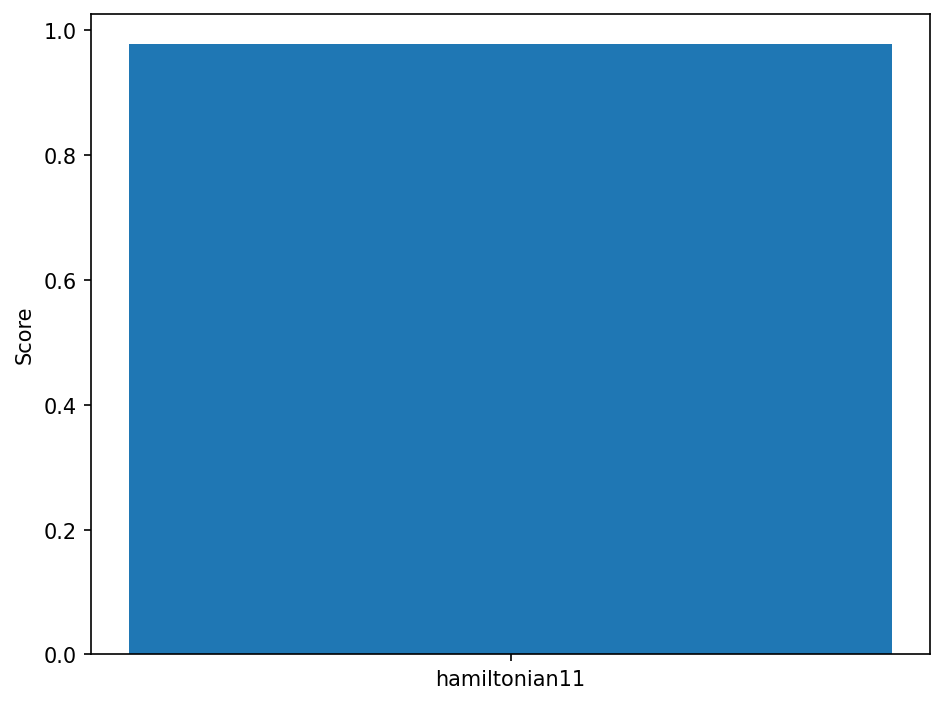

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: hamiltonian13 ; SCORE = 0.9817696863298057


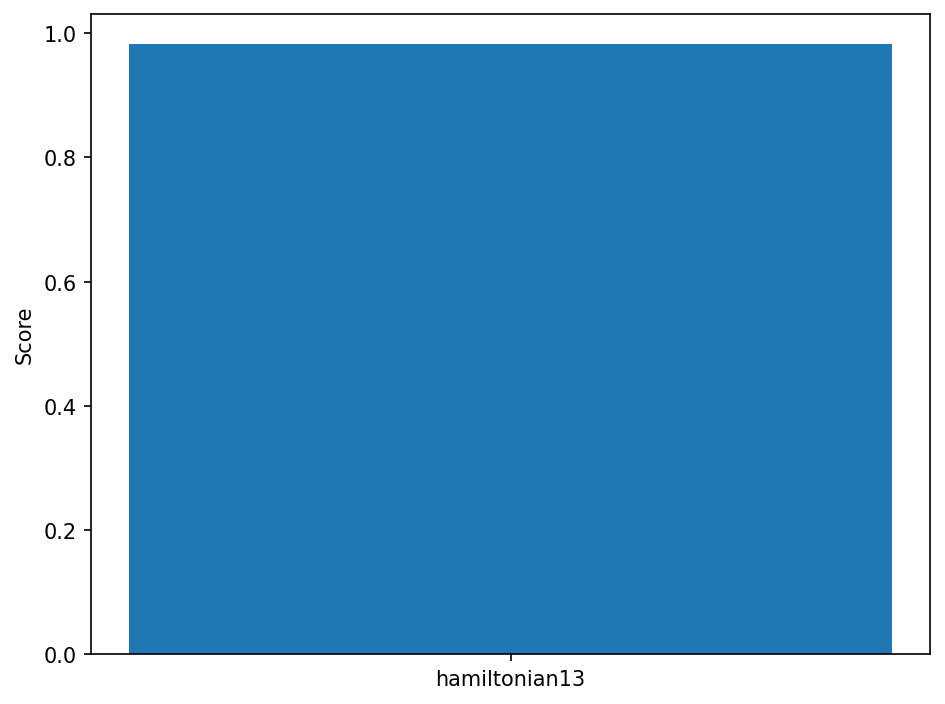

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: hamiltonian15 ; SCORE = 0.9861399427400619


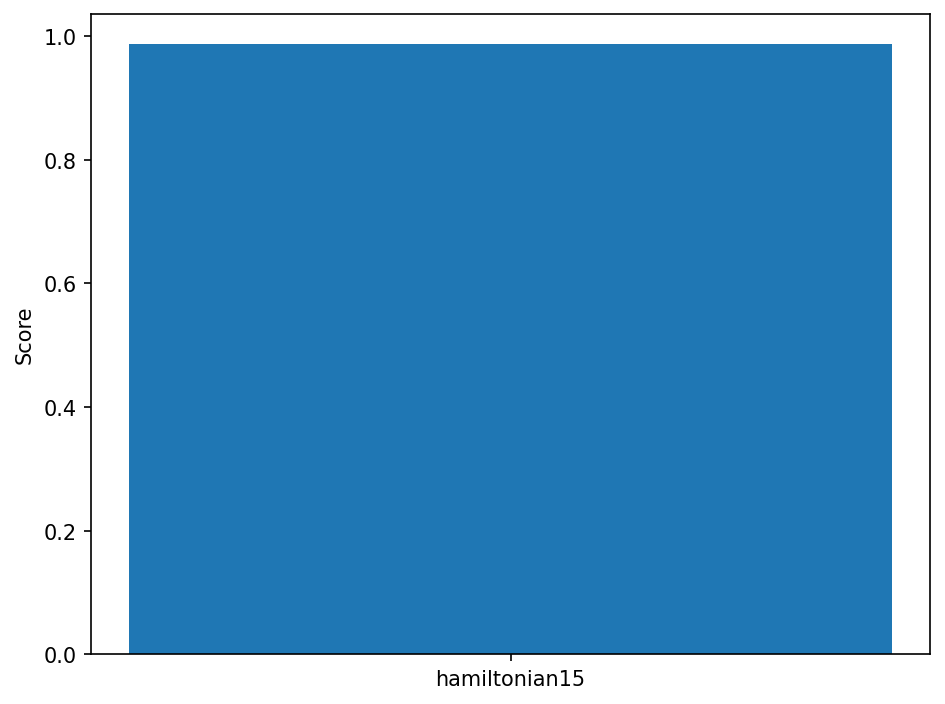

-----------------------------------------------------------


In [7]:
for label,benchmark,backend,job,score,sd in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

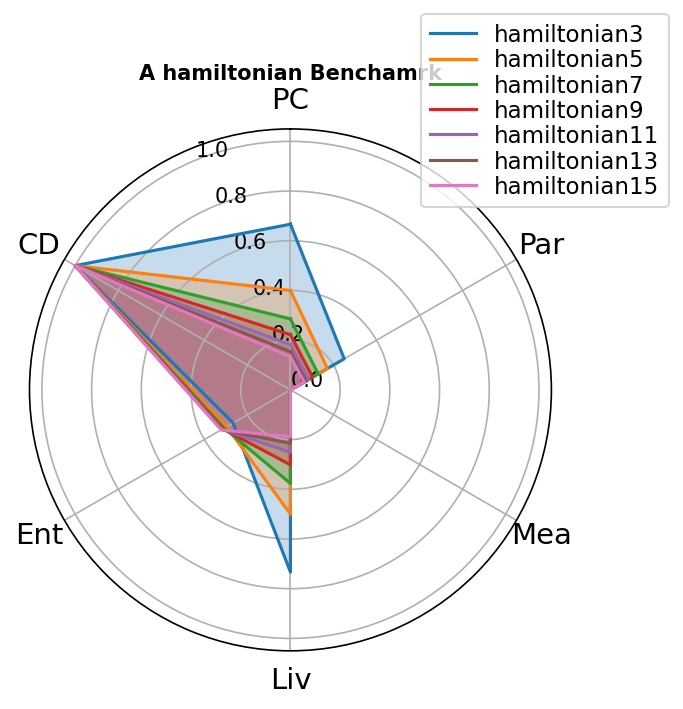

In [8]:
names=[]
scores=[]
X="A "+name_of_algo+' Benchamrk'
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark([X,names,scores],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],show=True)

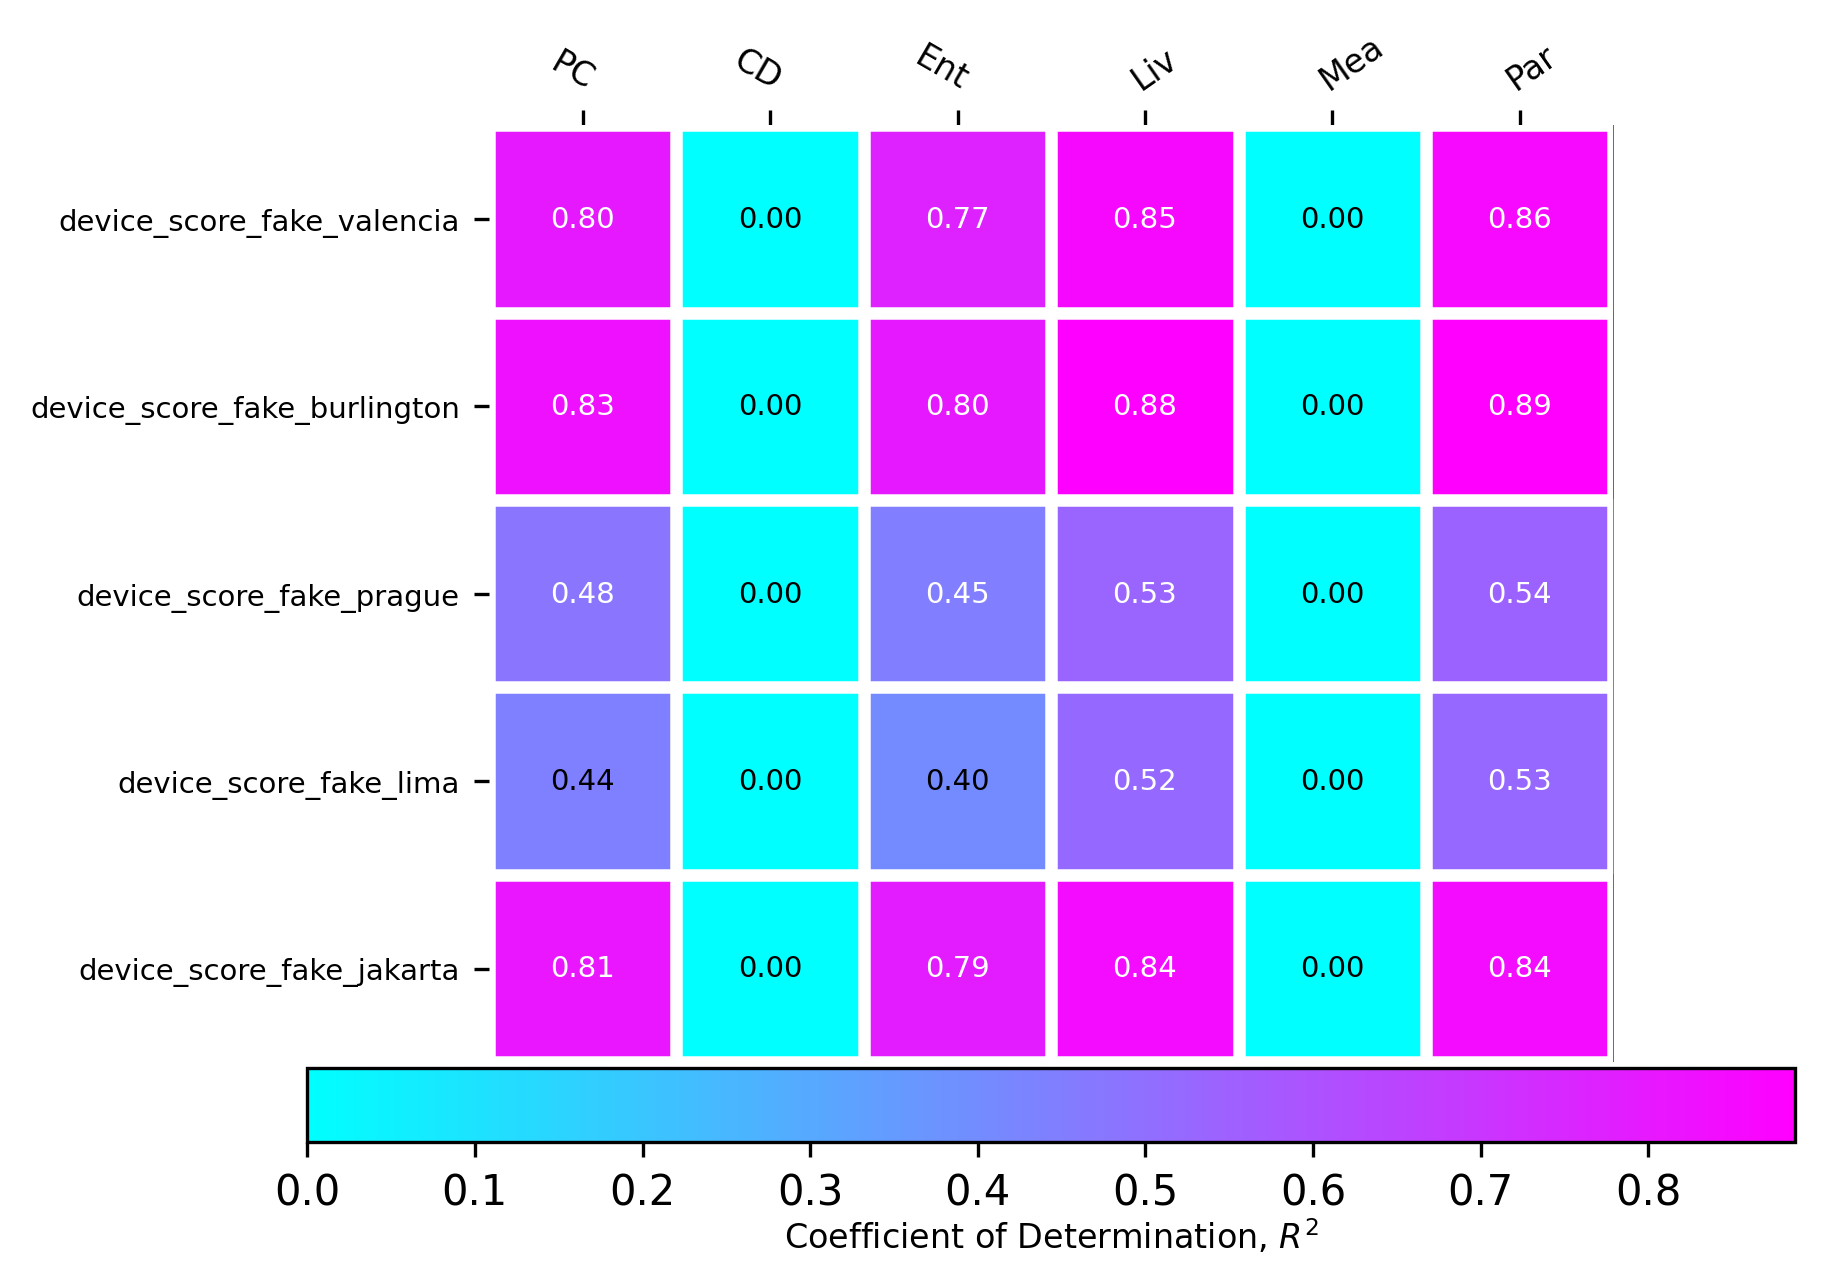

In [9]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

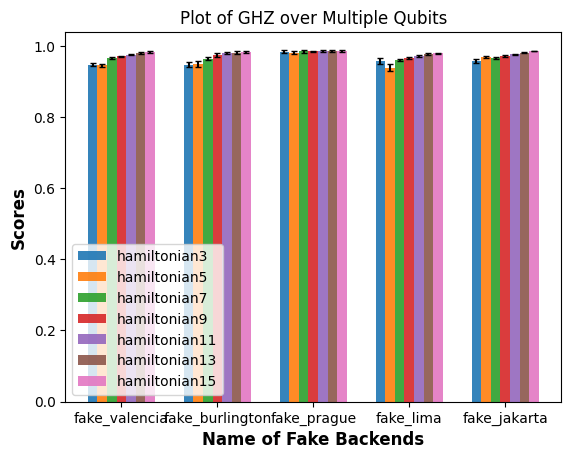

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
all_fake_names=[]
all_score=[]
all_sd=[]
all_ckt=[]
for i in selected_fakes:
    all_fake_names.append(i().name)    
for benchmark, label in benchmarks:
    i=[]
    j=[]
    k=[]
    for ckt,benchmark,backend,job,score,sd in jobs:
        if ckt == label:
            i.append(score)
            j.append(sd)
    all_ckt.append(label)
    all_score.append(i)
    all_sd.append(j)
num_bars = len(all_score)
width = 0.1
x = np.arange(len(all_fake_names)) # x-axis positions for each bar
fig, ax = plt.subplots()
for i in range(num_bars):               # Create bars for each category with appropriate offsets
    ax.bar(x + i * width, all_score[i], width=width, label=f'Bar {i+1}', 
           yerr=all_sd[i],align='center',alpha=0.9,ecolor='black',capsize=2)
ax.set_xlabel('Name of Fake Backends',fontweight ='bold',fontsize = 12)
ax.set_ylabel('Scores',fontweight ='bold',fontsize = 12)
ax.set_title('Plot of GHZ over Multiple Qubits')
ax.set_xticks(x + (num_bars - 1) * width / 2)
ax.set_xticklabels(all_fake_names)
ax.legend(all_ckt,loc="lower left")
#ax.grid(True)
plt.show()